In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('float_format', '{:.3f}'.format)
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import zscore, iqr, median_abs_deviation
from sklearn.model_selection import train_test_split,  KFold, cross_validate
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,  precision_score, recall_score, f1_score

# Import the data

In [27]:
#import data from
df_nasa = pd.read_csv('exoplanets.csv', sep=',', header=0)
# Print the shape of the dataset
print(df_nasa.shape)
# Print the first 100 rows of the dataset
df_nasa.head(100)

(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3734868,K00805.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.053,0,1,0,0,...,-169.000,4.359,0.180,-0.180,1.024,0.280,-0.186,287.697,38.886,15.646
96,3832474,K00806.01,Kepler-30 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-120.000,4.556,0.014,-0.081,0.867,0.079,-0.037,285.284,38.947,15.403
97,8395660,K00116.03,Kepler-106 b,CONFIRMED,CANDIDATE,0.950,0,0,0,0,...,-117.000,4.406,0.090,-0.110,1.012,0.154,-0.103,300.864,44.338,12.882
98,3832474,K00806.02,Kepler-30 c,CONFIRMED,CANDIDATE,0.745,0,0,0,0,...,-120.000,4.556,0.014,-0.081,0.867,0.079,-0.037,285.284,38.947,15.403


In [28]:
#Rename columns (more meaningful names)
df_nasa = df_nasa.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
df_nasa.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509


# Explore the data 

In [29]:
# Print the data types of the dataset
df_nasa.dtypes

KepID                                                      int64
KOIName                                                   object
KeplerName                                                object
ExoplanetArchiveDisposition                               object
DispositionUsingKeplerData                                object
DispositionScore                                         float64
NotTransit-LikeFalsePositiveFlag                           int64
koi_fpflag_ss                                              int64
CentroidOffsetFalsePositiveFlag                            int64
EphemerisMatchIndicatesContaminationFalsePositiveFlag      int64
OrbitalPeriod_days                                       float64
OrbitalPeriodUpperUnc_days                               float64
OrbitalPeriodLowerUnc_days                               float64
TransitEpoch_BKJD                                        float64
TransitEpochUpperUnc_BKJD                                float64
TransitEpochLowerUnc_BKJD

In [30]:
# Analysing type of data
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2359 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

(array([[<Axes: title={'center': 'KepID'}>,
         <Axes: title={'center': 'DispositionScore'}>,
         <Axes: title={'center': 'NotTransit-LikeFalsePositiveFlag'}>,
         <Axes: title={'center': 'koi_fpflag_ss'}>,
         <Axes: title={'center': 'CentroidOffsetFalsePositiveFlag'}>,
         <Axes: title={'center': 'EphemerisMatchIndicatesContaminationFalsePositiveFlag'}>,
         <Axes: title={'center': 'OrbitalPeriod_days'}>],
        [<Axes: title={'center': 'OrbitalPeriodUpperUnc_days'}>,
         <Axes: title={'center': 'OrbitalPeriodLowerUnc_days'}>,
         <Axes: title={'center': 'TransitEpoch_BKJD'}>,
         <Axes: title={'center': 'TransitEpochUpperUnc_BKJD'}>,
         <Axes: title={'center': 'TransitEpochLowerUnc_BKJD'}>,
         <Axes: title={'center': 'ImpactParamete'}>,
         <Axes: title={'center': 'ImpactParameterUpperUnc'}>],
        [<Axes: title={'center': 'ImpactParameterLowerUnc'}>,
         <Axes: title={'center': 'TransitDuration_hrs'}>,
        

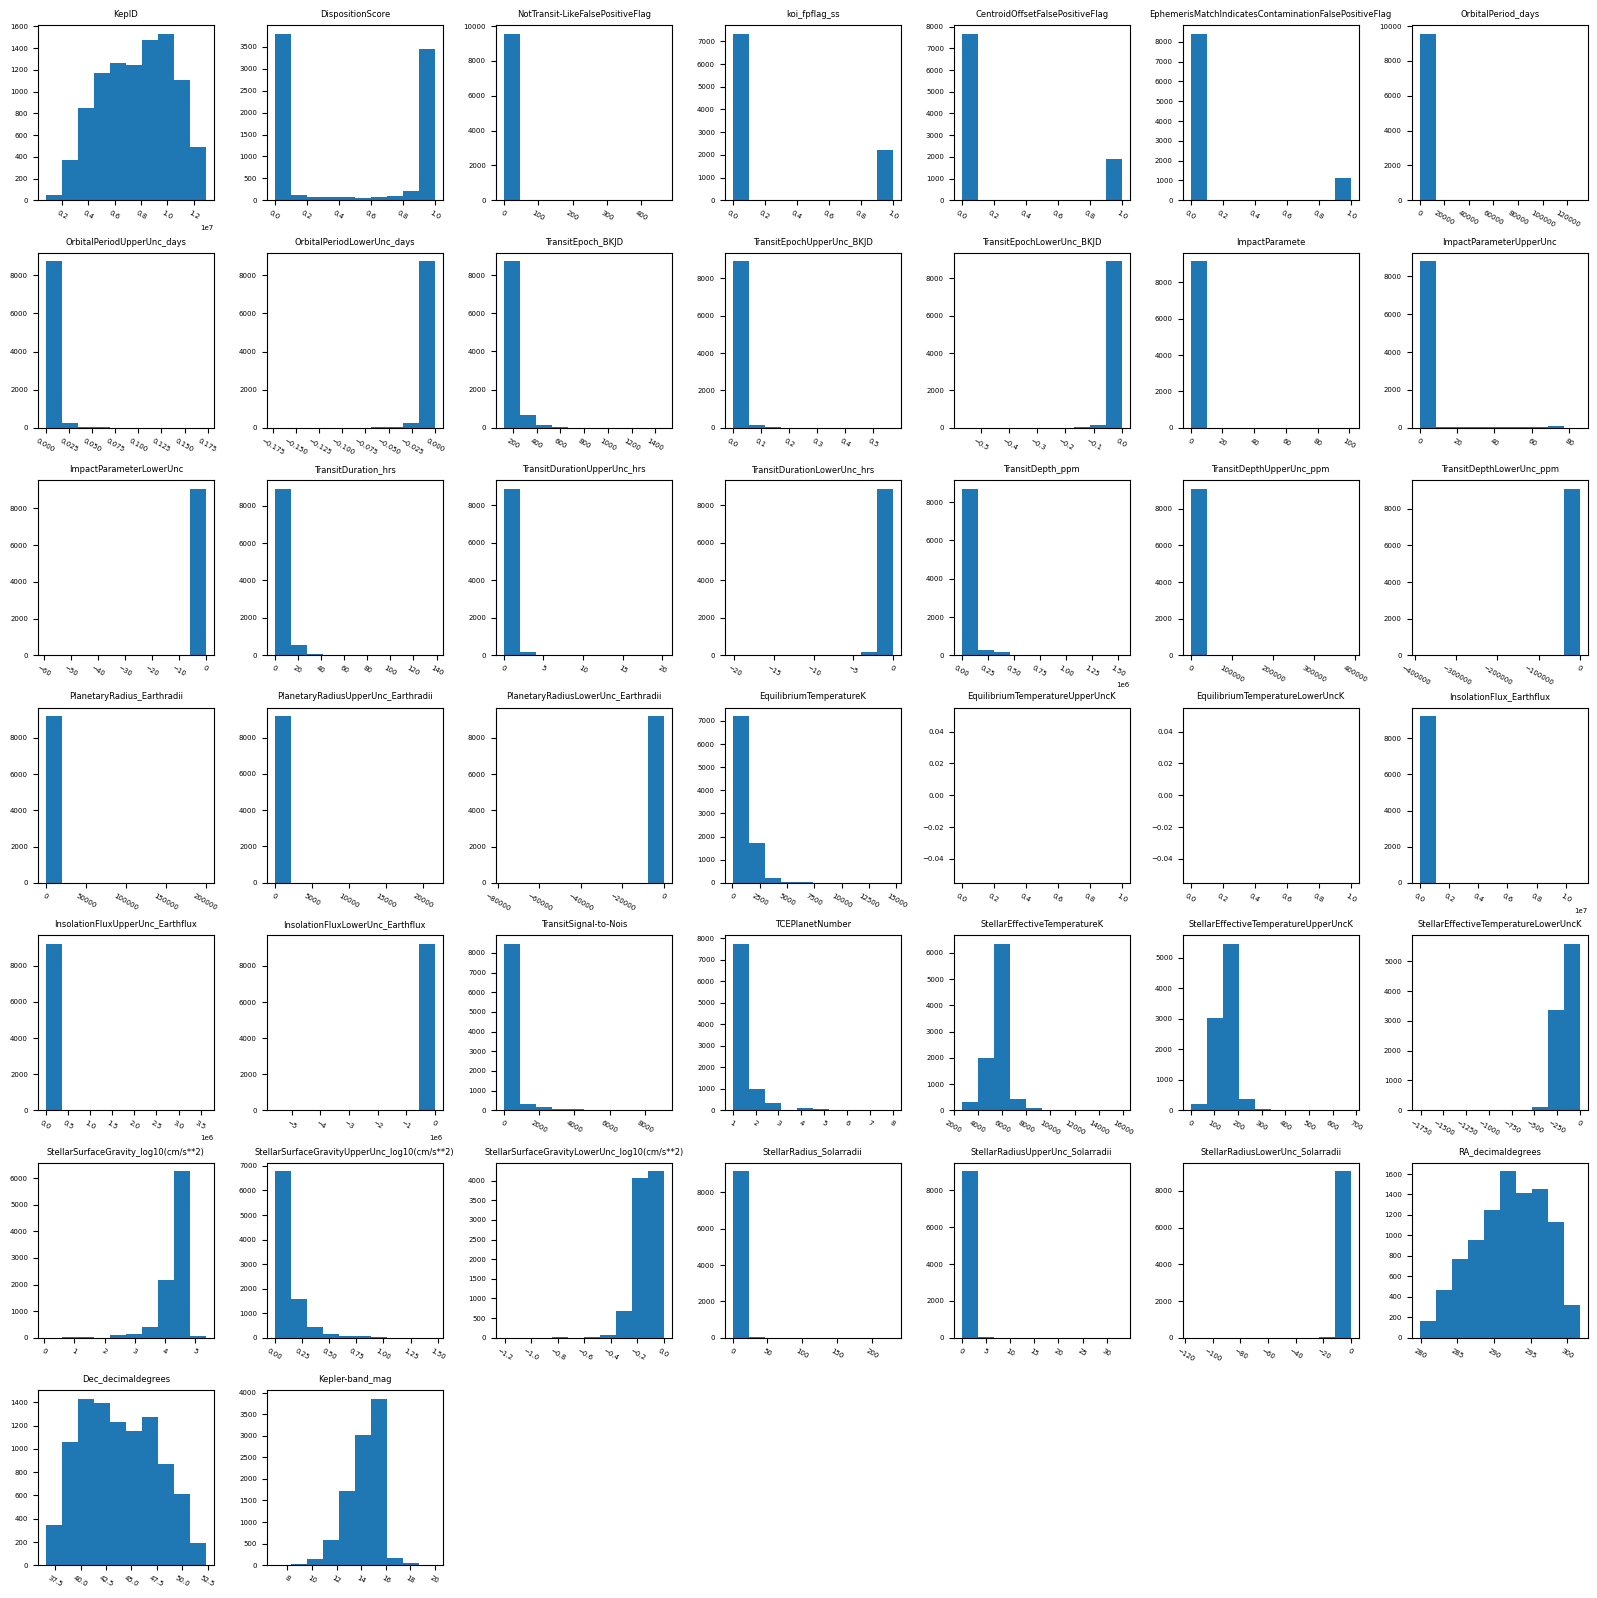

In [31]:
%matplotlib inline
# Plot histogram grid to check how data is distributed
df_nasa.hist(figsize=(20,20), xrot=-30, grid=False), 
plt.show()

In [32]:
#Decribe the the columns to get a better understanding of the data
df_nasa.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,9564.000,8054.000,9564.000,9564.000,9564.000,9564.000,9564.000,9110.000,9110.000,9564.000,...,9081.000,9201.000,9096.000,9096.000,9201.000,9096.000,9096.000,9564.000,9564.000,9563.000
mean,7690628.327,0.481,0.209,0.233,0.198,0.120,75.671,0.002,-0.002,166.183,...,-162.265,4.310,0.121,-0.143,1.729,0.362,-0.395,292.060,43.810,14.265
std,2653459.081,0.477,4.767,0.423,0.398,0.325,1334.744,0.008,0.008,67.919,...,72.746,0.433,0.133,0.085,6.127,0.931,2.168,4.767,3.601,1.385
min,757450.000,0.000,0.000,0.000,0.000,0.000,0.242,0.000,-0.173,120.516,...,-1762.000,0.047,0.000,-1.207,0.109,0.000,-116.137,279.853,36.577,6.966
25%,5556034.250,0.000,0.000,0.000,0.000,0.000,2.734,0.000,-0.000,132.762,...,-198.000,4.218,0.042,-0.196,0.829,0.129,-0.250,288.661,40.777,13.440
50%,7906892.000,0.334,0.000,0.000,0.000,0.000,9.753,0.000,-0.000,137.225,...,-160.000,4.438,0.070,-0.128,1.000,0.251,-0.111,292.261,43.678,14.520
75%,9873066.500,0.998,0.000,0.000,0.000,0.000,40.715,0.000,-0.000,170.695,...,-114.000,4.543,0.149,-0.088,1.345,0.364,-0.069,295.859,46.715,15.322
max,12935144.000,1.000,465.000,1.000,1.000,1.000,129995.778,0.173,0.000,1472.522,...,0.000,5.364,1.472,0.000,229.908,33.091,0.000,301.721,52.336,20.003


We have to choices for the target variable ExoplanetArchiveDisposition and DispositionUsingKeplerData check dirstribution of the two of them

In [33]:
# Print the unique classes and their counts/frequencies
df_nasa['ExoplanetArchiveDisposition'].value_counts()

ExoplanetArchiveDisposition
FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: count, dtype: int64

In [34]:
# Print the unique classes and their counts/frequencies
df_nasa['DispositionUsingKeplerData'].value_counts()

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64

As the ExoplanetArchiveDisposition is using some archive knowledge we dont have access to and our goal is to predict based on  the kepler data we will choose DispositionUsingKeplerData as our target variable

We will have binary classification problem <br>
data is evenly distrobuted between candidate and False positive so no resampling necessary

We will make candidate class 1 and not candidate class 0

In [35]:
#make the target variable binary 
#make target variable numeric
df_nasa['ExoplanetCandidate'] = df_nasa['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

# Data Cleaning

the following columns are useless for predictions and can be dropped 
(DispositionUsingKeplerData can be dropped as it was tranformed to binary in the column Exoplanet candidate) 

In [36]:
#drop for prediction useless columns (names, etc) useless columns
df_nasa.drop(columns=['KepID','KOIName','KeplerName', \
                    'ExoplanetArchiveDisposition','TCEDeliver',\
                    'TCEPlanetNumber','DispositionUsingKeplerData'], inplace=True)

# Missing values

In [37]:
#Number of Null values in the columns
df_nasa.isnull().sum()

DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                454
OrbitalPeriodLowerUnc_days                                454
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                 454
TransitEpochLowerUnc_BKJD                                 454
ImpactParamete                                            363
ImpactParameterUpperUnc                                   454
ImpactParameterLowerUnc                                   454
TransitDuration_hrs                                         0
TransitDurationUpperUnc_hrs                               454
TransitD

In [38]:
# Columns EquilibriumTemperatureUpperUncK and EquilibriumTemperatureLowerUncK are always 0 so just drop them
df_nasa.drop(columns=['EquilibriumTemperatureUpperUncK','EquilibriumTemperatureLowerUncK'], inplace=True)

<BarContainer object of 7 artists>

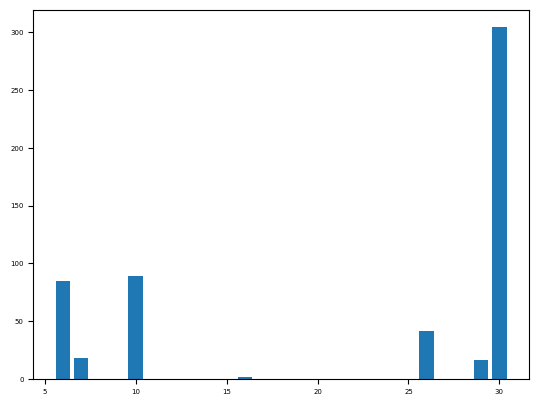

(9564, 41)


In [39]:
# For the other null values check for correlations in terms that there might be rows with multiple null values

null_counts = df_nasa.isnull().sum(axis=1)
null_values_row = null_counts.value_counts()
# only the ones with multiple null values 
null_values_row = null_values_row[(null_values_row.index != 0) & (null_values_row.index != 1)]
plt.bar(null_values_row.index, null_values_row.values)
plt.show()
print(df_nasa.shape)

we can see that we have rows with up to 30 null values as we are right know only considering 41 columns we will drop all rows with 10 or more null values as around 25% of those rows need would need to be imputed so the gain in information with those rows is limited


In [40]:
# Filter the rows where the null count is less than or equal to 5
rows_to_keep = null_counts[null_counts < 10].index

# Drop the rows where the null count is greater than 5
df_nasa = df_nasa.loc[rows_to_keep]
print(df_nasa.shape)
df_nasa.head()

(9110, 41)


,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,TransitEpochUpperUnc_BKJD,...,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag,ExoplanetCandidate
0,1.000,0,0,0,0,9.488,0.000,-0.000,170.539,0.002,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
1,0.969,0,0,0,0,54.418,0.000,-0.000,162.514,0.004,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
2,0.000,0,0,0,0,19.899,0.000,-0.000,175.850,0.001,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436,1
3,0.000,0,1,0,0,1.737,0.000,-0.000,170.308,0.000,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597,0
4,1.000,0,0,0,0,2.526,0.000,-0.000,171.596,0.001,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509,1


We only lose 454 out of 9564 rows so less than 5% of our data

In [41]:
df_nasa.isnull().sum()

DispositionScore                                         1206
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                  0
OrbitalPeriodLowerUnc_days                                  0
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                   0
TransitEpochLowerUnc_BKJD                                   0
ImpactParamete                                              0
ImpactParameterUpperUnc                                     0
ImpactParameterLowerUnc                                     0
TransitDuration_hrs                                         0
TransitDurationUpperUnc_hrs                                 0
TransitD

Still some missing values but looking better

# Correlation

<Figure size 2000x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

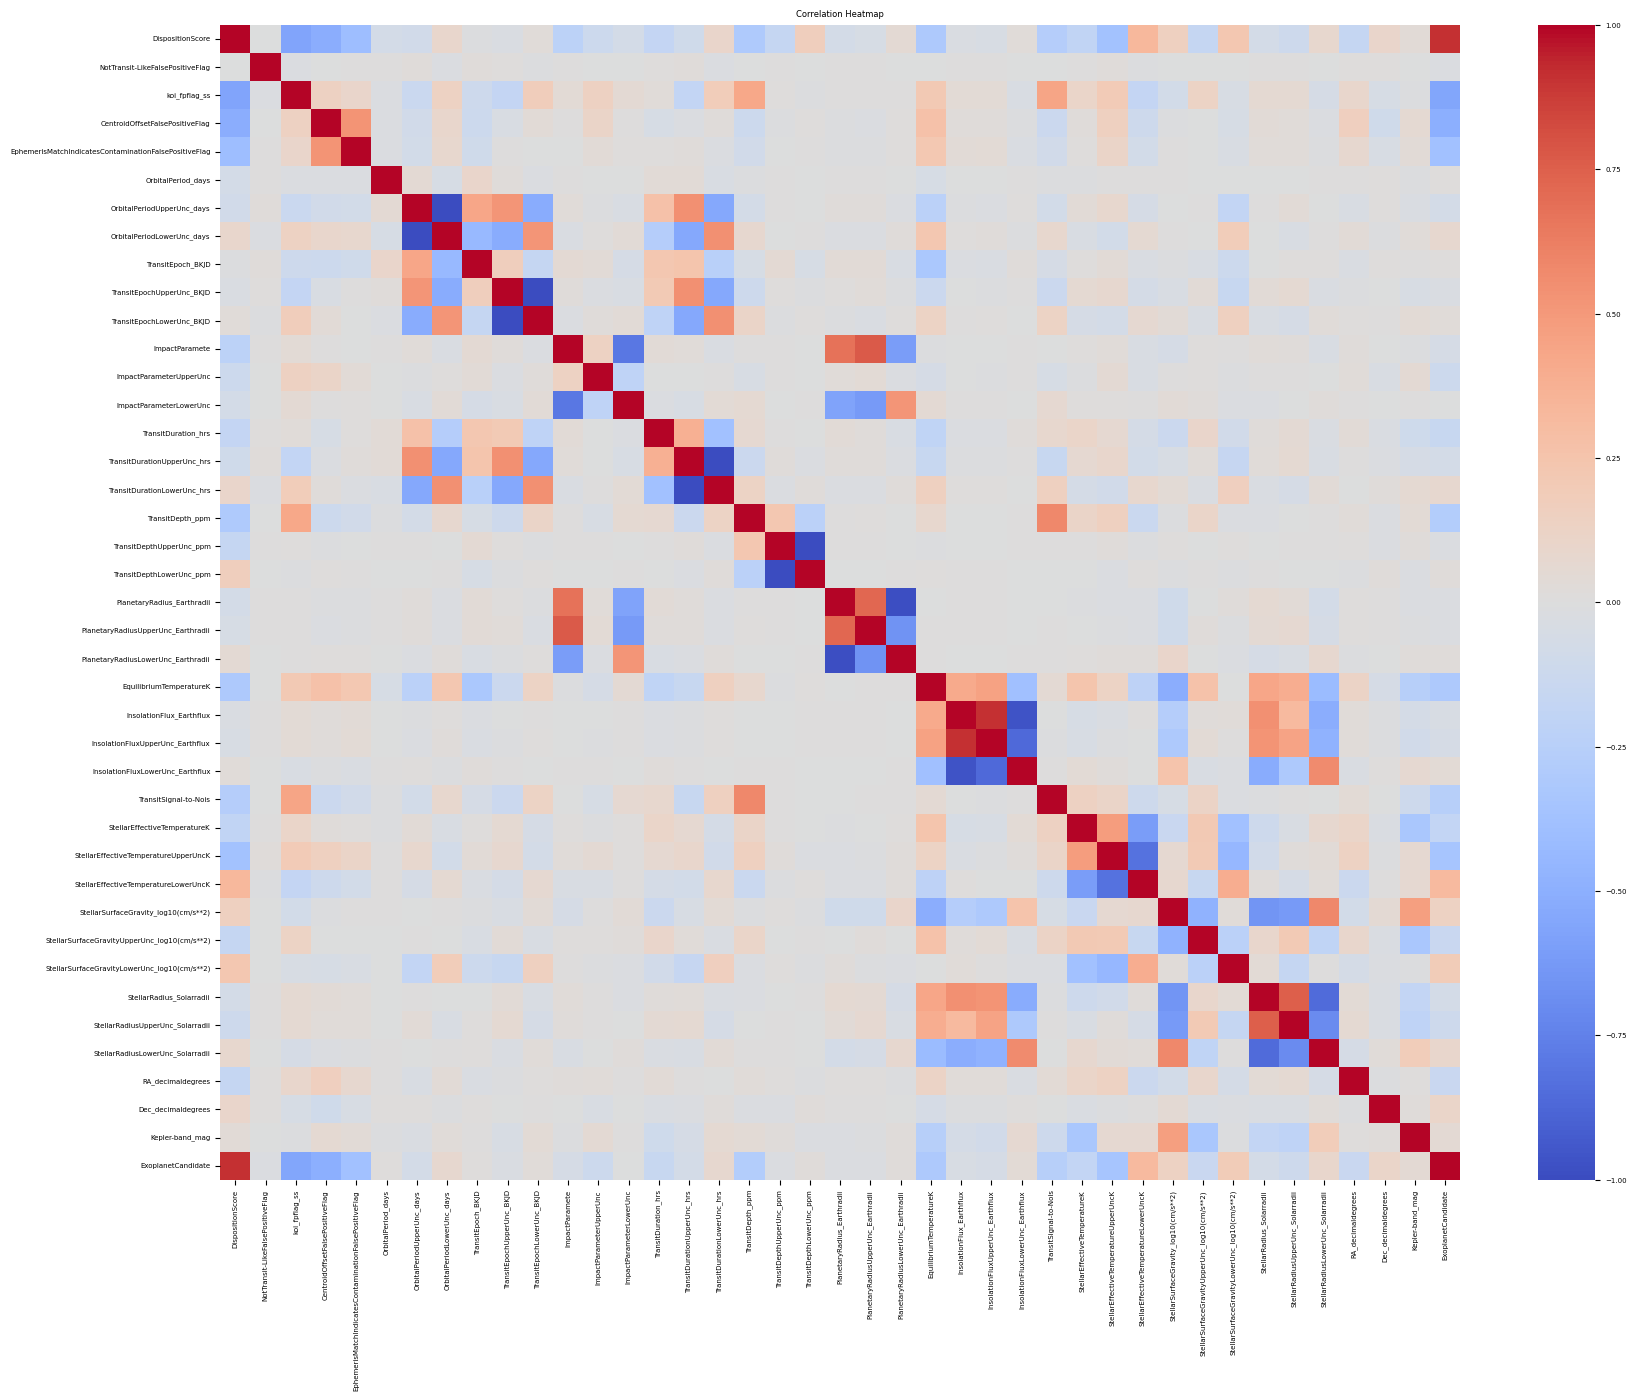

In [42]:
# Compute correlation matrix, include only float and int columns
#%matplotlib qt
%matplotlib inline
corr_matrix = df_nasa.select_dtypes(include=['float', 'int64']).corr()
plt.figure(figsize=(20, 15))
# Plot correlation heatmap
sn.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


disposition score has very strong correlation to our target variable (makes sense as it is not an observation but a computed value) so drop the disposition score

In [43]:
#drp disposition score
df_nasa.drop(columns=['DispositionScore'], inplace=True)

other observation the uncertainties always quite strong negatively correlated to each other because of that we wil add both of the value to always have just one uncertainty value (feuture engineering)

to be able to sum the values we first have to impute the missing values as some of the uncertainty columns have null values for the imputation we first have to perform the train and test split so lets start with that

In [44]:
#drop flags (still not hundered percent sure about this one)
df_nasa.drop(columns=['NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag','EphemerisMatchIndicatesContaminationFalsePositiveFlag'], inplace=True)

# Split data in train and test

In [45]:
X = df_nasa.loc[:,df_nasa.columns != 'ExoplanetCandidate']
y = df_nasa['ExoplanetCandidate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X_test.head()

,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,TransitEpochUpperUnc_BKJD,TransitEpochLowerUnc_BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration_hrs,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
2892,7.329,0.000,-0.000,132.129,0.002,-0.002,0.983,0.079,-0.771,1.211,...,-76.000,4.464,0.084,-0.039,0.874,0.048,-0.069,297.042,39.912,14.316
3035,4.993,0.000,-0.000,169.553,0.002,-0.002,1.232,22.920,-0.233,3.101,...,-152.000,4.429,0.101,-0.188,0.951,0.253,-0.136,296.809,48.965,14.917
3251,0.535,0.000,-0.000,131.736,0.002,-0.002,0.017,0.405,-0.017,3.340,...,-136.000,4.551,0.078,-0.048,0.738,0.072,-0.079,292.379,39.436,14.937
8022,0.710,0.000,-0.000,131.977,0.006,-0.006,0.145,0.323,-0.145,1.318,...,-169.000,4.373,0.153,-0.187,1.002,0.269,-0.179,299.772,44.363,15.444
4023,10.777,0.000,-0.000,140.290,0.010,-0.010,0.069,0.381,-0.069,2.616,...,-162.000,4.457,0.124,-0.170,0.852,0.190,-0.127,287.087,42.669,14.587


# Outliers 

Hanndeling the outilers

In [47]:
# #Plot the boxplot for all columns to check outliers
# #Choosing only float or int columns
# cols = X_train.select_dtypes(include=['float', 'int64']).columns
# fig, axes = plt.subplots(4, 3, figsize=(15, 15))
# plt.rcParams.update({'font.size': 5})
# #Make a boxplot for each numerical column
# for i, ax in enumerate(axes.flatten()):
#     sn.boxplot(y=cols[i], data=X_train, ax=ax)
# plt.tight_layout()
# plt.show()

Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

#### For trainig data

<Axes: ylabel='OrbitalPeriod_days'>

<Axes: ylabel='OrbitalPeriodUpperUnc_days'>

<Axes: ylabel='OrbitalPeriodLowerUnc_days'>

<Axes: ylabel='TransitEpoch_BKJD'>

<Axes: ylabel='TransitEpochUpperUnc_BKJD'>

<Axes: ylabel='TransitEpochLowerUnc_BKJD'>

<Axes: ylabel='ImpactParamete'>

<Axes: ylabel='ImpactParameterUpperUnc'>

<Axes: ylabel='ImpactParameterLowerUnc'>

<Axes: ylabel='TransitDuration_hrs'>

<Axes: ylabel='TransitDurationUpperUnc_hrs'>

<Axes: ylabel='TransitDurationLowerUnc_hrs'>

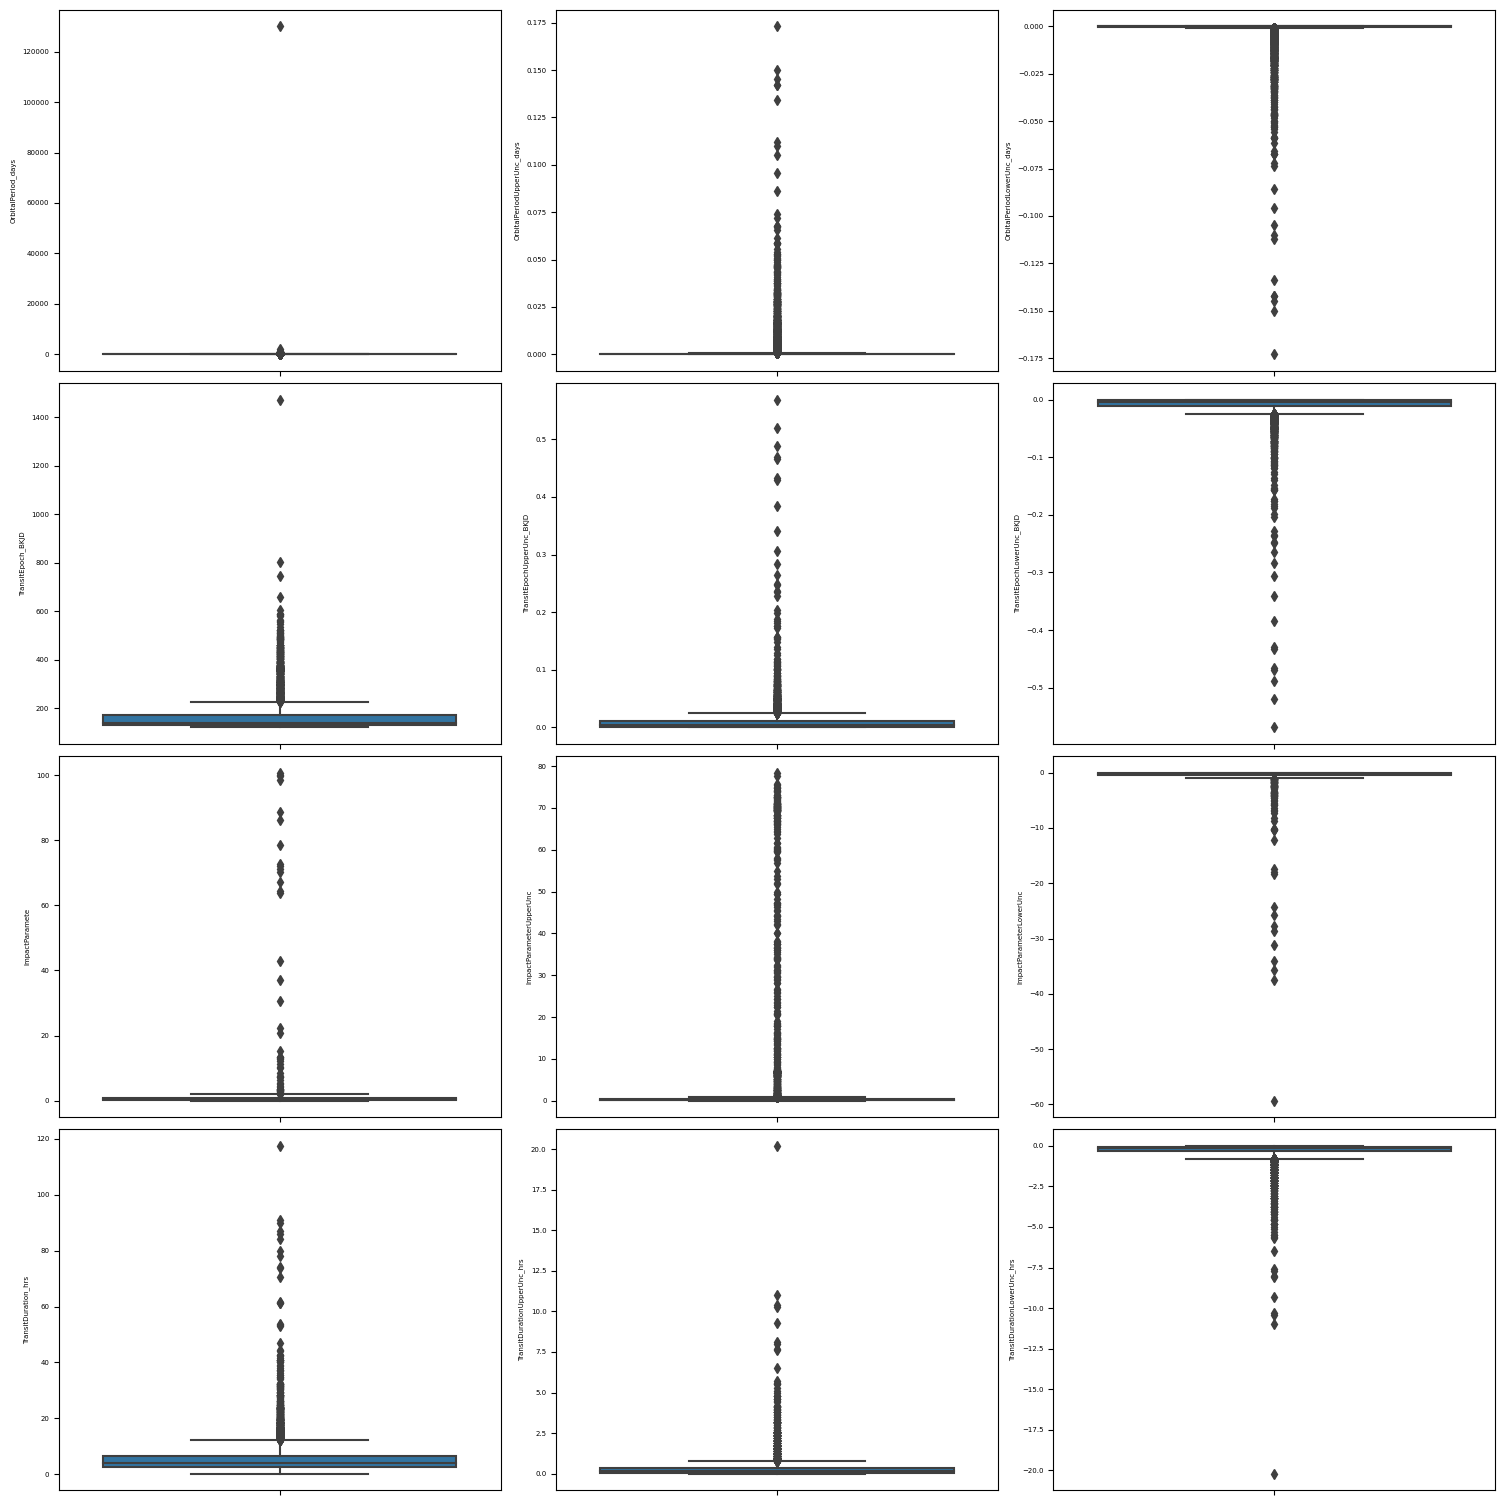

In [48]:
#Plot the boxplot for all columns to check outliers
#Choosing only float or int columns
cols = X_train.select_dtypes(include=['float', 'int64']).columns
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
plt.rcParams.update({'font.size': 5})
#Make a boxplot for each numerical column
for i, ax in enumerate(axes.flatten()):
    sn.boxplot(y=cols[i], data=X_train, ax=ax)
plt.tight_layout()
plt.show()

In [49]:
#Calculate the upper and lower bound

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [50]:
#print the upper and lower bound
for col in cols_ts:
    lr,ur=outlier_treatment(X_train[col])
    print(col,lr,ur)

NameError: name 'cols_ts' is not defined

In [ ]:
#Counting of the outliers to see how many of them we have
for col in cols:
    lr, ur = outlier_treatment(X_train[col])
    num_outliers = X_train[(X_train[col] < lr) | (X_train[col] > ur)][col].count()
    print(f"{col}: {num_outliers} outliers")

OrbitalPeriod_days: 1002 outliers
OrbitalPeriodUpperUnc_days: 1114 outliers
OrbitalPeriodLowerUnc_days: 1114 outliers
TransitEpoch_BKJD: 658 outliers
TransitEpochUpperUnc_BKJD: 556 outliers
TransitEpochLowerUnc_BKJD: 556 outliers
ImpactParamete: 52 outliers
ImpactParameterUpperUnc: 492 outliers
ImpactParameterLowerUnc: 89 outliers
TransitDuration_hrs: 543 outliers
TransitDurationUpperUnc_hrs: 634 outliers
TransitDurationLowerUnc_hrs: 634 outliers
TransitDepth_ppm: 1209 outliers
TransitDepthUpperUnc_ppm: 735 outliers
TransitDepthLowerUnc_ppm: 735 outliers
PlanetaryRadius_Earthradii: 946 outliers
PlanetaryRadiusUpperUnc_Earthradii: 1120 outliers
PlanetaryRadiusLowerUnc_Earthradii: 914 outliers
EquilibriumTemperatureK: 278 outliers
InsolationFlux_Earthflux: 949 outliers
InsolationFluxUpperUnc_Earthflux: 1009 outliers
InsolationFluxLowerUnc_Earthflux: 982 outliers
TransitSignal-to-Nois: 1063 outliers
StellarEffectiveTemperatureK: 371 outliers
StellarEffectiveTemperatureUpperUncK: 0 outlier

In [61]:
#We are using winsorize function to "nomalize" the outilers

def winsorize(data, lower_percentile=0.05, upper_percentile=0.95):
    """
    Apply winsorization to the given dataset.

    Args:
        data: NumPy array, pandas Series, or pandas DataFrame containing the dataset.
        lower_percentile: Percentile below which values will be replaced (default: 0.05).
        upper_percentile: Percentile above which values will be replaced (default: 0.95).

    Returns:
        Winsorized dataset as a pandas DataFrame or Series with column structure maintained.
    """
    if isinstance(data, pd.DataFrame):
        winsorized_data = data.copy()
        for col in winsorized_data.columns:
            lower_limit = np.percentile(winsorized_data[col], lower_percentile * 100)
            upper_limit = np.percentile(winsorized_data[col], upper_percentile * 100)

            winsorized_data[col] = np.where(winsorized_data[col] < lower_limit, lower_limit, winsorized_data[col])
            winsorized_data[col] = np.where(winsorized_data[col] > upper_limit, upper_limit, winsorized_data[col])
    elif isinstance(data, pd.Series):
        data_array = data.values.reshape(-1, 1)
        lower_limit = np.percentile(data_array, lower_percentile * 100)
        upper_limit = np.percentile(data_array, upper_percentile * 100)

        winsorized_data = np.where(data_array < lower_limit, lower_limit, data_array)
        winsorized_data = np.where(data_array > upper_limit, upper_limit, winsorized_data)
        winsorized_data = pd.Series(winsorized_data.flatten(), index=data.index)
    else:
        data_array = np.asarray(data).reshape(-1, 1)
        lower_limit = np.percentile(data_array, lower_percentile * 100)
        upper_limit = np.percentile(data_array, upper_percentile * 100)

        winsorized_data = np.where(data_array < lower_limit, lower_limit, data_array)
        winsorized_data = np.where(data_array > upper_limit, upper_limit, winsorized_data)
        winsorized_data = pd.DataFrame(winsorized_data, columns=[data.name])

    return winsorized_data

In [ ]:
#calling the function winsorize
data = X_train[col]
X_train = winsorize(data)
print(X_train)

5370   17.453
3126   14.172
4861   14.160
5346   14.114
8179   14.520
        ...  
5844   15.469
5279   14.534
5481   17.506
873    15.204
7595   14.966
Length: 6103, dtype: float64


#### For test data

<Axes: ylabel='OrbitalPeriod_days'>

<Axes: ylabel='OrbitalPeriodUpperUnc_days'>

<Axes: ylabel='OrbitalPeriodLowerUnc_days'>

<Axes: ylabel='TransitEpoch_BKJD'>

<Axes: ylabel='TransitEpochUpperUnc_BKJD'>

<Axes: ylabel='TransitEpochLowerUnc_BKJD'>

<Axes: ylabel='ImpactParamete'>

<Axes: ylabel='ImpactParameterUpperUnc'>

<Axes: ylabel='ImpactParameterLowerUnc'>

<Axes: ylabel='TransitDuration_hrs'>

<Axes: ylabel='TransitDurationUpperUnc_hrs'>

<Axes: ylabel='TransitDurationLowerUnc_hrs'>

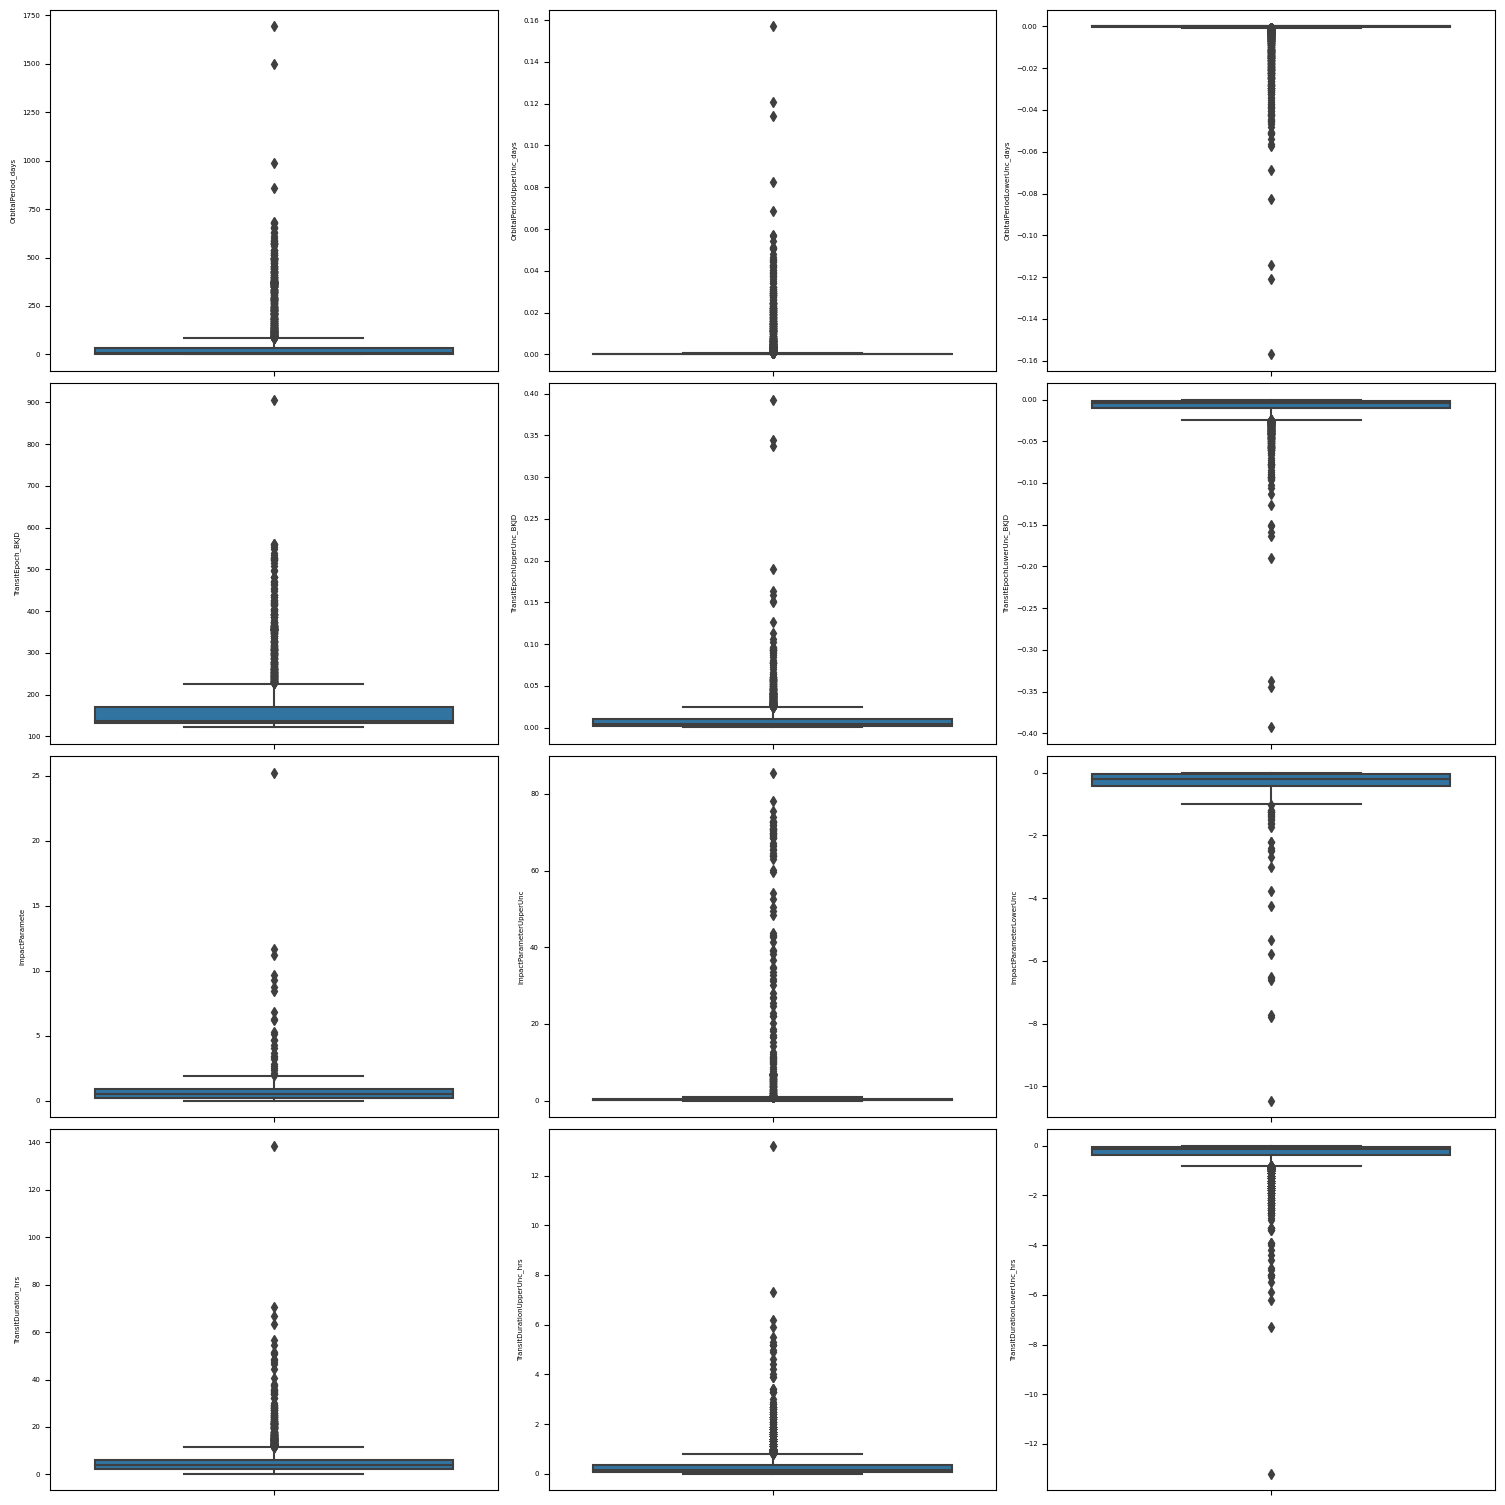

In [ ]:
#Plot the boxplot for all columns to check outliers
#Choosing only float or int columns
cols = X_test.select_dtypes(include=['float', 'int64']).columns
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
plt.rcParams.update({'font.size': 5})
#Make a boxplot for each numerical column
for i, ax in enumerate(axes.flatten()):
    sn.boxplot(y=cols[i], data=X_test, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
#Counting of the outliers to see how many of them we have
for col in cols:
    lr, ur = outlier_treatment(X_test[col])
    num_outliers = X_test[(X_test[col] < lr) | (X_test[col] > ur)][col].count()
    print(f"{col}: {num_outliers} outliers")

OrbitalPeriod_days: 496 outliers
OrbitalPeriodUpperUnc_days: 541 outliers
OrbitalPeriodLowerUnc_days: 541 outliers
TransitEpoch_BKJD: 326 outliers
TransitEpochUpperUnc_BKJD: 277 outliers
TransitEpochLowerUnc_BKJD: 277 outliers
ImpactParamete: 27 outliers
ImpactParameterUpperUnc: 244 outliers
ImpactParameterLowerUnc: 32 outliers
TransitDuration_hrs: 287 outliers
TransitDurationUpperUnc_hrs: 301 outliers
TransitDurationLowerUnc_hrs: 301 outliers
TransitDepth_ppm: 580 outliers
TransitDepthUpperUnc_ppm: 350 outliers
TransitDepthLowerUnc_ppm: 350 outliers
PlanetaryRadius_Earthradii: 486 outliers
PlanetaryRadiusUpperUnc_Earthradii: 584 outliers
PlanetaryRadiusLowerUnc_Earthradii: 458 outliers
EquilibriumTemperatureK: 128 outliers
InsolationFlux_Earthflux: 467 outliers
InsolationFluxUpperUnc_Earthflux: 492 outliers
InsolationFluxLowerUnc_Earthflux: 472 outliers
TransitSignal-to-Nois: 520 outliers
StellarEffectiveTemperatureK: 169 outliers
StellarEffectiveTemperatureUpperUncK: 0 outliers
Stell

In [ ]:
#calling the function winsorize
data = X_test[col]
X_test = winsorize(data)
print(X_test)

2892   14.316
3035   14.917
3251   14.937
8022   15.444
4023   14.587
        ...  
3034   11.705
8089   14.327
8693   15.343
682    15.173
6801   15.214
Length: 3007, dtype: float64


In [51]:
X_train.head()

,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,TransitEpochUpperUnc_BKJD,TransitEpochLowerUnc_BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration_hrs,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
5370,0.615,0.000,-0.000,132.022,0.000,-0.000,0.506,0.021,-0.018,1.931,...,-157.000,4.612,0.052,-0.028,0.663,0.048,-0.058,294.360,46.125,17.453
3126,15.907,0.000,-0.000,177.930,0.001,-0.001,0.014,0.417,-0.014,3.988,...,-101.000,4.554,0.036,-0.050,0.797,0.052,-0.042,290.297,37.749,14.172
4861,302.780,0.010,-0.010,355.599,0.027,-0.027,0.001,0.440,-0.001,16.847,...,-154.000,4.572,0.042,-0.168,0.797,0.207,-0.069,295.984,40.044,14.160
5346,7.441,0.000,-0.000,137.343,0.018,-0.018,1.286,47.360,-0.518,2.875,...,-252.000,4.321,0.105,-0.195,1.183,0.340,-0.183,287.372,46.565,14.114
8179,129.847,0.005,-0.005,240.681,0.024,-0.024,0.004,0.430,-0.004,13.057,...,-257.000,4.427,0.072,-0.217,1.032,0.334,-0.119,293.677,40.334,14.520


In [52]:
X_test.head()

,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,TransitEpochUpperUnc_BKJD,TransitEpochLowerUnc_BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration_hrs,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
2892,7.329,0.000,-0.000,132.129,0.002,-0.002,0.983,0.079,-0.771,1.211,...,-76.000,4.464,0.084,-0.039,0.874,0.048,-0.069,297.042,39.912,14.316
3035,4.993,0.000,-0.000,169.553,0.002,-0.002,1.232,22.920,-0.233,3.101,...,-152.000,4.429,0.101,-0.188,0.951,0.253,-0.136,296.809,48.965,14.917
3251,0.535,0.000,-0.000,131.736,0.002,-0.002,0.017,0.405,-0.017,3.340,...,-136.000,4.551,0.078,-0.048,0.738,0.072,-0.079,292.379,39.436,14.937
8022,0.710,0.000,-0.000,131.977,0.006,-0.006,0.145,0.323,-0.145,1.318,...,-169.000,4.373,0.153,-0.187,1.002,0.269,-0.179,299.772,44.363,15.444
4023,10.777,0.000,-0.000,140.290,0.010,-0.010,0.069,0.381,-0.069,2.616,...,-162.000,4.457,0.124,-0.170,0.852,0.190,-0.127,287.087,42.669,14.587


# Impute the missing values (seperatly for train and test)

In [53]:
def impute_missing_values(df):

    columns_with_missing_values = [
        'StellarEffectiveTemperatureLowerUncK',
        'StellarEffectiveTemperatureUpperUncK',
        'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
        'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
        'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
        'StellarRadiusLowerUnc_Solarradii',
        'StellarRadiusUpperUnc_Solarradii',
        'Kepler-band_mag'
             ]

    imputer = KNNImputer(n_neighbors=3)
    df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

    return df


In [54]:
#impute missing values in the sets
X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

In [55]:
#check if all missing values were imputed
X_train.isnull().sum()

OrbitalPeriod_days                              0
OrbitalPeriodUpperUnc_days                      0
OrbitalPeriodLowerUnc_days                      0
TransitEpoch_BKJD                               0
TransitEpochUpperUnc_BKJD                       0
TransitEpochLowerUnc_BKJD                       0
ImpactParamete                                  0
ImpactParameterUpperUnc                         0
ImpactParameterLowerUnc                         0
TransitDuration_hrs                             0
TransitDurationUpperUnc_hrs                     0
TransitDurationLowerUnc_hrs                     0
TransitDepth_ppm                                0
TransitDepthUpperUnc_ppm                        0
TransitDepthLowerUnc_ppm                        0
PlanetaryRadius_Earthradii                      0
PlanetaryRadiusUpperUnc_Earthradii              0
PlanetaryRadiusLowerUnc_Earthradii              0
EquilibriumTemperatureK                         0
InsolationFlux_Earthflux                        0


In [56]:
X_test.isnull().sum()

OrbitalPeriod_days                              0
OrbitalPeriodUpperUnc_days                      0
OrbitalPeriodLowerUnc_days                      0
TransitEpoch_BKJD                               0
TransitEpochUpperUnc_BKJD                       0
TransitEpochLowerUnc_BKJD                       0
ImpactParamete                                  0
ImpactParameterUpperUnc                         0
ImpactParameterLowerUnc                         0
TransitDuration_hrs                             0
TransitDurationUpperUnc_hrs                     0
TransitDurationLowerUnc_hrs                     0
TransitDepth_ppm                                0
TransitDepthUpperUnc_ppm                        0
TransitDepthLowerUnc_ppm                        0
PlanetaryRadius_Earthradii                      0
PlanetaryRadiusUpperUnc_Earthradii              0
PlanetaryRadiusLowerUnc_Earthradii              0
EquilibriumTemperatureK                         0
InsolationFlux_Earthflux                        0


# Feature Engineering

now we can combine the uncertainty columns with the high negative correlations

In [57]:
def combine_uncertainties(df):
    
    df['OrbitalPeriodUnc'] = abs(df['OrbitalPeriodUpperUnc_days']) + abs(df['OrbitalPeriodLowerUnc_days'])
    df['TransitEpochUnc'] = abs(df['TransitEpochUpperUnc_BKJD']) + abs(df['TransitEpochLowerUnc_BKJD'])
    df['ImpactParameterUnc'] = abs(df['ImpactParameterUpperUnc']) + abs(df['ImpactParameterLowerUnc'])
    df['TransitDurationUnc_hrs'] = abs(df['TransitDurationUpperUnc_hrs']) + abs(df['TransitDurationLowerUnc_hrs'])
    df['TransitDepthUnc_ppm'] = abs(df['TransitDepthUpperUnc_ppm']) + abs(df['TransitDepthLowerUnc_ppm'])
    df['PlanetaryRadiusUnc_Earthradii'] = abs(df['PlanetaryRadiusUpperUnc_Earthradii']) + abs(df['PlanetaryRadiusLowerUnc_Earthradii'])
    df['InsolationFluxUnc_Earthflux'] = abs(df['InsolationFluxUpperUnc_Earthflux']) + abs(df['InsolationFluxLowerUnc_Earthflux'])
    df['StellarEffectiveTemperatureUncK'] = abs(df['StellarEffectiveTemperatureUpperUncK']) + abs(df['StellarEffectiveTemperatureLowerUncK'])
    df['StellarSurfaceGravityUnc_log10(cm/s**2)'] = abs(df['StellarSurfaceGravityUpperUnc_log10(cm/s**2)']) + abs(df['StellarSurfaceGravityLowerUnc_log10(cm/s**2)'])
    df['StellarRadiusUnc_Solarradii'] = abs(df['StellarRadiusUpperUnc_Solarradii']) + abs(df['StellarRadiusLowerUnc_Solarradii'])
    
    
    df.drop(columns=['OrbitalPeriodUpperUnc_days','OrbitalPeriodLowerUnc_days','TransitEpochUpperUnc_BKJD',\
                     'TransitEpochLowerUnc_BKJD','ImpactParameterUpperUnc','ImpactParameterLowerUnc',\
                     'TransitDurationUpperUnc_hrs','TransitDurationLowerUnc_hrs','TransitDepthUpperUnc_ppm',\
                     'TransitDepthLowerUnc_ppm','PlanetaryRadiusUpperUnc_Earthradii','PlanetaryRadiusLowerUnc_Earthradii',\
                     'InsolationFluxUpperUnc_Earthflux',\
                     'InsolationFluxLowerUnc_Earthflux','StellarEffectiveTemperatureUpperUncK',\
                     'StellarEffectiveTemperatureLowerUncK','StellarSurfaceGravityUpperUnc_log10(cm/s**2)',\
                     'StellarSurfaceGravityLowerUnc_log10(cm/s**2)','StellarRadiusUpperUnc_Solarradii',\
                     'StellarRadiusLowerUnc_Solarradii'], inplace=True)
    
    return df

In [58]:
X_train = combine_uncertainties(X_train)
X_test = combine_uncertainties(X_test)

# Scaling

as there is no clear gaussanity use the Min/Max Scaler

In [59]:
#as Min/Max scaler is not working right now because of outliers use for now standard scaler
def scaling(X, y, scaler=None):    
    # scale only based on the training data set
    if scaler is None: 
        # We only want the scaler to fit the train data
        #scaler = MinMaxScaler()
        scaler = StandardScaler()
        X= scaler.fit_transform(X)
    else: 
        X = scaler.transform(X) 

    return X, y, scaler

In [60]:
X_train, y_train, scaler = scaling(X_train,y_train)
X_test, y_test, _ = scaling(X_test,y_test,scaler)